In [602]:
import numpy as np
import random

In [617]:
# Parámetros y constantes
m = 96         # Número de intervalos
F = 2          # Número de sentidos (direcciones)
n= [5, 5]   # Flota por sentido
alpha = 10     # Duración de cada intervalo
t_ruta = 40    # Tiempo de ruta
t_min = 5      # Tiempo de maniobra
h_min = 5    # Intervalo mínimo entre servicios
h_max = 15     # Intervalo máximo entre servicios
C = 45         # Capacidad del bus

In [618]:
import pandas as pd

In [619]:
df = pd.read_excel("Datos Demanda.xlsx")

# Extraer los valores de la columna 5 (índice 4, ya que los índices comienzan en 0)
Tasa_Panzenu_1 = df["Tasa Panzenu Sentido 1"].tolist()

# Mostrar la lista
print(Tasa_Panzenu_1)
len(Tasa_Panzenu_1)

[0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.2, 3.1, 3.0, 3.0, 2.9, 2.7, 2.6, 2.5, 2.3, 2.2, 2.1, 1.9, 1.8, 1.6, 1.5, 1.4, 1.2, 1.1, 1.0, 0.9, 0.8]


96

In [620]:
Tasa_Panzenu_2 = df["Tasa Panzenu Sentido 2"].tolist()

# Mostrar la lista
print(Tasa_Panzenu_2)
len(Tasa_Panzenu_2)

[0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.2, 3.1, 3.0, 3.0, 2.9, 2.7, 2.6, 2.5, 2.3, 2.2, 2.1, 1.9, 1.8, 1.6, 1.5, 1.4, 1.2, 1.1, 1.0, 0.9, 0.8]


96

In [621]:
tasas= [[Tasa_Panzenu_1[i], Tasa_Panzenu_2[i]] for i in range(len(Tasa_Panzenu_1))]
print(tasas)

[[0.8, 0.8], [1.0, 1.0], [1.1, 1.1], [1.3, 1.3], [1.4, 1.4], [1.6, 1.6], [1.7, 1.7], [1.8, 1.8], [2.0, 2.0], [2.1, 2.1], [2.2, 2.2], [2.3, 2.3], [2.4, 2.4], [2.4, 2.4], [2.5, 2.5], [2.6, 2.6], [2.6, 2.6], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.7, 2.7], [2.8, 2.8], [2.8, 2.8], [2.8, 2.8], [2.9, 2.9], [2.9, 2.9], [2.9, 2.9], [3.0, 3.0], [3.0, 3.0], [3.1, 3.1], [3.1, 3.1], [3.2, 3.2], [3.2, 3.2], [3.2, 3.2], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.3, 3.3], [3.2, 3.2], [3.1, 3.1], [3.0, 3.0], [3.0, 3.0], [2.9, 2.9], [2.7, 2.7], [2.6, 2.6], [2.5, 2.5], [2.

In [622]:
x = np.zeros((max(n), F, m), dtype=int) # Matriz de despacho
b = np.zeros((m, F), dtype=int)                     # Pasajeros que abordan
w = np.zeros((m, F), dtype=int)                     # Pasajeros que esperan
llegadas_pasajeros = np.zeros((m, F))

In [623]:
#LLenar la matriz de pasajeros que llegan teniendo en cuenta la tasas de llegada y el tamaño del intervalo
for t in range(m):
    for f in range(F):
        llegadas_pasajeros[t, f] = tasas[t][f] * alpha

In [624]:
#Llenar el primer intervalos de la matriz de pasajeros esperando
for t in range(m):
    for f in range(F):
        if t == 0:
            w[t,f]=llegadas_pasajeros[t, f]  # La cantidad de pasajeros esperando en el primer intervalo es igual a la cantidad de pasajeros que llegan en ese intervalo


In [625]:
print (w)

[[8 8]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [626]:
def generar_rcl(i, f):
    rcl = []
    #Asigno cada bus i del sentido f al intervalo t
    for t in range(m):
      x[i,f,t]=1
      #Solo puedo asignar un bus i a un intervalo t en el sentido f
      if sum(x[:,f,t])>1:
        x[i,f,t]=0
        continue
      # Calcula el número de intervalos que representan los tiempos mínimos y máximos
      tiempo_min_intervalos = int((2 * t_ruta + 2 * t_min) / alpha)
      tiempo_max_intervalos = int((2 * t_ruta + 2 * t_min + 2 * h_max) / alpha)
      # Asegurar que el despacho se produzca en el rango permitido
      if t - tiempo_max_intervalos >=0:
        if sum(x[i, f, t - k] for k in range(tiempo_min_intervalos, tiempo_max_intervalos + 1)) >= x[i, f, t]:
           x[i,f,t]=1
        else:
           x[i,f,t]=0
           continue
      # Si se ha asignado un bus i en el intervalo t < tiempo_min_intervalos, ese mismo bus no puede volver a ser asignado a otro intervalo hasta no cumplir con el tiempo minimo
      if t>=1 and t<tiempo_min_intervalos:
         if sum(x[i, f,k] for k in range(t+1))<= 1:
           x[i,f,t]=1
         else:
           x[i,f,t]=0
           continue
      # Si se ha asignado un bus i en el intervalo t, ese mismo bus no puede volver a ser asignado a otro intervalo hasta no cumplir con el tiempo minimo
      if t>= tiempo_min_intervalos:
        if sum(x[i,f,t-k] for k in range (0, tiempo_min_intervalos))>1:
          x[i,f,t]=0
          continue
      # Si el bus i se despacha en el intervalo t, asegurarse de que todos los buses anteriores ya se han despachado
      if i>0:
         if sum(x[j, f, t_j] for j in range(i) for t_j in range(t+1))>=x[i,f,t]:
            x[i,f,t]=1
         else:
            x[i,f,t]=0
            continue
      # Calcula los intervalos para `h_min` y `h_max`
      min_intervalos = int(h_min / alpha)
      max_intervalos = int(h_max / alpha)
      # Asegurar que si el bus `i` está en el intervalo `t`, el bus `j` se asignó en algún intervalo entre [t - max_intervalos, t - min_intervalos]
      if i>=1 and t - max_intervalos >= 0:
         # Si el bus `i` se despacha en `t`, el bus `j` debió ser despachado en algún intervalo entre `t - max_intervalos` y `t - min_intervalos`
         if sum(x[i-1,f,t-k]for k in range(min_intervalos, max_intervalos + 1))>= x[i,f,t]:
           x[i,f,t]=1
         else:
           x[i,f,t]=0
           continue
      #El primer despacho del primer bus debe asignarse entre [h_min, h_max]
      if t>=0 and t<int(h_min/alpha) and i==0:
        x[i,f,t]=0
        continue
      #El ultimo despacho que se asigne debe asegurar que el bus logra realizar toda la ruta antes de que se termine el ultimo intervalo
      t_ruta_intervals = int(t_ruta / alpha)
      #Calcular el límite de intervalos
      t_limite = m - (t_ruta_intervals)
      if t >=t_limite and t<m:
        x[i, f,t] = 0
        continue
      rcl.append(t)
    return rcl


In [627]:
generar_rcl(0,0)

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]

In [628]:
def metaheuristica():
        for f in range(F):
           for i in range(n[f]):
              # Generar la lista de intervalos t factibles para asignar el bus i
              rcl = generar_rcl(i, f)
              if len(rcl) == 0:
                 continue
              # Despachar el bus i en todos sus posibles intervalos t factibles
              for t in rcl:
                x[i, f, t] = 1
        for f in range(F):
            for t in range(m-1):
                #La cantidad de pasajeros que abordan el bus i no puede superar la capacidad del bus
                b[t, f] = min(sum(x[i,f,t] * C for i in range(n[f])), w[t,f])
                #Actualizacion de la cantidad de pasajeros esperando en cada intervalo t en el sentido f
                w[t,f]-=b[t,f]
                w[t+1,f]=w[t,f]+llegadas_pasajeros[t+1,f]-b[t+1,f]
        pasajeros_esperando=np.sum(w)
        return pasajeros_esperando

In [629]:
metaheuristica()

28614

In [630]:
print("Asignaciones de servicios:")
for i in range(max(n)):
    for f in range(F):
        for t in range(m):
            if x[i,f, t] == 1:
               print(f"Bus {i}, Sentido {f}, Intervalo {t}")

print("Pasajeros abordando por intervalo y sentido:")
print(b)
print("Pasajeros esperando por intervalo y sentido:")
print(w)
print("Pasajeros llegando por intervalo y sentido")
print(llegadas_pasajeros)

Asignaciones de servicios:
Bus 0, Sentido 0, Intervalo 0
Bus 0, Sentido 0, Intervalo 9
Bus 0, Sentido 0, Intervalo 18
Bus 0, Sentido 0, Intervalo 27
Bus 0, Sentido 0, Intervalo 36
Bus 0, Sentido 0, Intervalo 45
Bus 0, Sentido 0, Intervalo 54
Bus 0, Sentido 0, Intervalo 63
Bus 0, Sentido 0, Intervalo 72
Bus 0, Sentido 0, Intervalo 81
Bus 0, Sentido 0, Intervalo 90
Bus 0, Sentido 1, Intervalo 0
Bus 0, Sentido 1, Intervalo 9
Bus 0, Sentido 1, Intervalo 18
Bus 0, Sentido 1, Intervalo 27
Bus 0, Sentido 1, Intervalo 36
Bus 0, Sentido 1, Intervalo 45
Bus 0, Sentido 1, Intervalo 54
Bus 0, Sentido 1, Intervalo 63
Bus 0, Sentido 1, Intervalo 72
Bus 0, Sentido 1, Intervalo 81
Bus 0, Sentido 1, Intervalo 90
Bus 1, Sentido 0, Intervalo 1
Bus 1, Sentido 0, Intervalo 10
Bus 1, Sentido 0, Intervalo 19
Bus 1, Sentido 0, Intervalo 28
Bus 1, Sentido 0, Intervalo 37
Bus 1, Sentido 0, Intervalo 46
Bus 1, Sentido 0, Intervalo 55
Bus 1, Sentido 0, Intervalo 64
Bus 1, Sentido 0, Intervalo 73
Bus 1, Sentido 0,

In [631]:
import matplotlib.pyplot as plt
import numpy as np

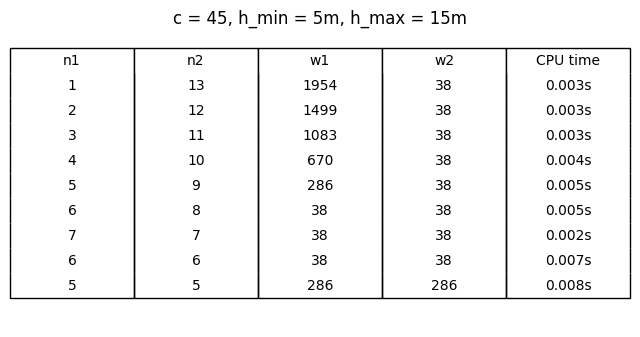

In [632]:
# Datos para la tabla
data = [
    [1, 13, 1954, 38, "0.003s"],
    [2, 12, 1499, 38, "0.003s"],
    [3, 11, 1083, 38, "0.003s"],
    [4, 10, 670, 38, "0.004s"],
    [5,9,286,38,"0.005s"],
    [6,8,38,38,"0.005s"],
    [7,7,38,38,"0.002s"],
    [6,6,38,38,"0.007s"],
    [5,5,286,286,"0.008s"]
]

# Encabezados de las columnas
column_labels = ["n1", "n2", "w1", "w2", "CPU time"]

# Crear la figura y la tabla
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")  # Ocultar los ejes
table = ax.table(cellText=data, colLabels=column_labels, cellLoc='center', loc='center')
# Ajustar el estilo de las líneas
for i in range(len(data) + 1):  # +1 para incluir la fila de encabezado
    for j in range(len(column_labels)):
        cell = table[(i, j)]
        # Para la primera fila (encabezado), mostrar superior y verticales
        if i == 0:
            cell.visible_edges = 'LTR'  # Borde izquierdo, derecho y superior
        # Para la última fila, mostrar inferior y verticales
        elif i == len(data):
            cell.visible_edges = 'LBR'  # Borde izquierdo, derecho y inferior
        # Para las filas intermedias, solo bordes verticales
        else:
            cell.visible_edges = 'LR'

# Escalar la tabla para mejor visualización
table.scale(1, 1.5)  # Escalar la tabla si es necesario para mejor visualización
plt.text(0.5, 1, "c = 45, h_min = 5m, h_max = 15m", ha='center', va='center', fontsize=12, transform=ax.transAxes)
# Mostrar la tabla
plt.show()